## 머신러닝
# 비지도학습 - 군집 (Clustering)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

### k-means 알고리즘
- 데이터들 사이의 **거리**에 기반한 대표적인 **비지도학습** 알고리즘
- 일반적으로 비지도학습은 목표값(y)를 모르는 경우에 적용한다
- 해결하려는 문제
> 품종(목표값)을 모르는 iris 데이터에서, 유사한 특징을 가지는 2개의 그룹으로 데이터를 나누고 싶다

In [3]:
### setosa 와 versicolor 를 추출, 속성은 2개
X = iris.data[:100, :2]
y = iris.target[:100] # 훈련에는 사용하지 않고 결과를 확인하는 용도로 사용함
X.shape, y.shape

((100, 2), (100,))

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

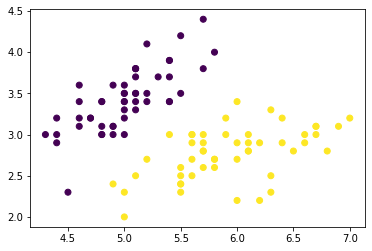

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)

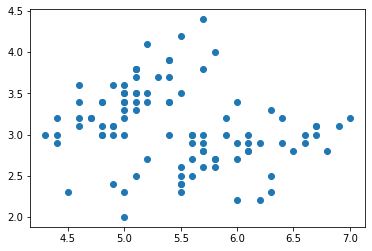

In [6]:
plt.scatter(X[:,0], X[:,1])

In [7]:
from sklearn.cluster import KMeans

In [9]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` o

In [11]:
model = KMeans(n_clusters=2) # n_clusters는 분리하고 싶은 그룹의 갯수
model.fit(X) # 입력값 X 만 사용함!!!

KMeans(n_clusters=2)

In [12]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [13]:
model.cluster_centers_

array([[5.01636364, 3.35090909],
       [6.02666667, 2.79111111]])

(4.165, 7.135, 1.010845080177451, 5.775421045532904)

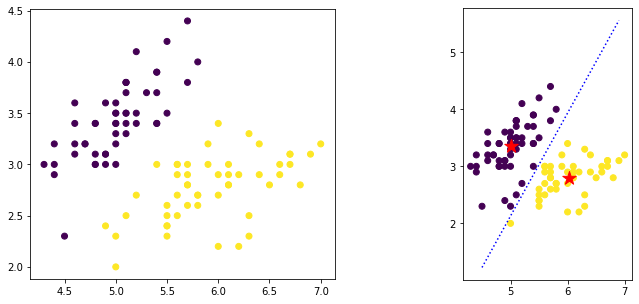

In [20]:
plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y) # 실제 iris 데이터 구성

plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=model.labels_)
cc = model.cluster_centers_
plt.scatter(cc[:,0], cc[:,1], c='r', s=200, marker='*') # KMeans 가 나눈 데이터 구성

p1, p2 = model.cluster_centers_
a = -(p1-p2)[0]/(p1-p2)[1]
c = (p1+p2)/2
xs = np.arange(4.5, 7, 0.1)
ys = a*(xs-c[0]) + c[1]
plt.plot(xs, ys, 'b:') # 두 중심점을 수직으로 가르는 구분선
plt.axis('scaled')

### 정규화 적용
- k-means 는 거리에 기반한 알고리즘이므로 **정규화** 적용은 필수이다

In [24]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

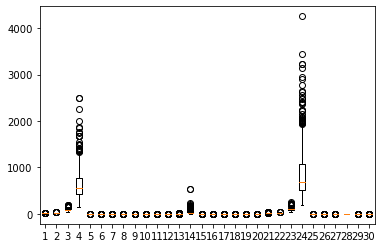

In [30]:
plt.boxplot(cancer.data); pass

In [34]:
X = cancer.data[:, [0,13]]
y = cancer.target
X.shape, y.shape

((569, 2), (569,))

In [35]:
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(n_clusters=2)

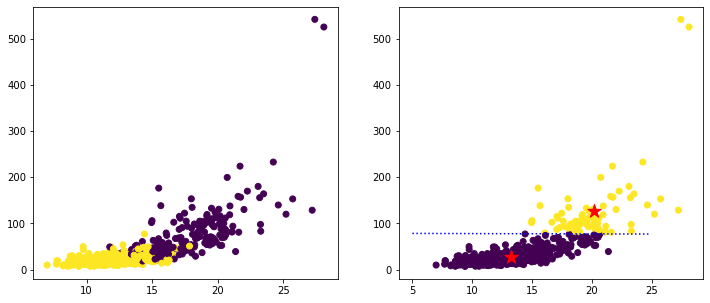

In [37]:
plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y) # 실제 iris 데이터 구성

plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=model.labels_)
cc = model.cluster_centers_
plt.scatter(cc[:,0], cc[:,1], c='r', s=200, marker='*') # KMeans 가 나눈 데이터 구성

p1, p2 = model.cluster_centers_
a = -(p1-p2)[0]/(p1-p2)[1]
c = (p1+p2)/2
xs = np.arange(5, 25, 0.1)
ys = a*(xs-c[0]) + c[1]
plt.plot(xs, ys, 'b:') # 두 중심점을 수직으로 가르는 구분선
#plt.axis('scaled')

In [42]:
X = cancer.data[:, [0,13]]
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
y = cancer.target
X_norm.shape, y.shape

((569, 2), (569,))

In [43]:
model = KMeans(n_clusters=2)
model.fit(X_norm)

KMeans(n_clusters=2)

(-2.3296951015122955,
 4.271334444071653,
 -4.218099303875796,
 11.768506149093623)

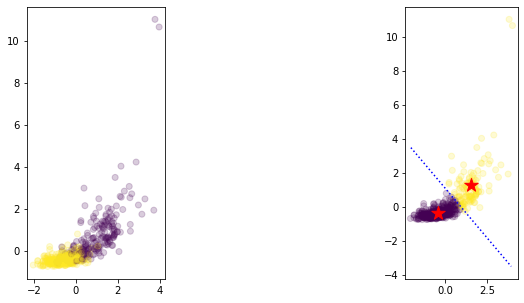

In [48]:
plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.scatter(X_norm[:,0], X_norm[:,1], c=y, alpha=0.2) # 실제 iris 데이터 구성
plt.axis('scaled')

plt.subplot(1,2,2)
plt.scatter(X_norm[:,0], X_norm[:,1], c=model.labels_, alpha=0.2)
cc = model.cluster_centers_
plt.scatter(cc[:,0], cc[:,1], c='r', s=200, marker='*') # KMeans 가 나눈 데이터 구성

p1, p2 = model.cluster_centers_
a = -(p1-p2)[0]/(p1-p2)[1]
c = (p1+p2)/2
xs = np.arange(-2, 4, 0.1)
ys = a*(xs-c[0]) + c[1]
plt.plot(xs, ys, 'b:') # 두 중심점을 수직으로 가르는 구분선
plt.axis('scaled')

### 전체 속성 사용

In [49]:
X = iris.data[:100] # 속성 4개 사용
#X = (X - X.mean(axis=0)) / X.std(axis=0)
y = iris.target[:100]
X.shape, y.shape

((100, 4), (100,))

In [50]:
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(n_clusters=2)

In [51]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [53]:
model.cluster_centers_

array([[5.936, 2.77 , 4.26 , 1.326],
       [5.006, 3.428, 1.462, 0.246]])

### 속성 변환 (transform)
- 클러스터 중심에서의 거리로 변환
- 그룹이 2개인 경우 변환후 산점도로 그릴 수 있다

In [54]:
X2 = model.transform(X)
X2.shape

(100, 2)

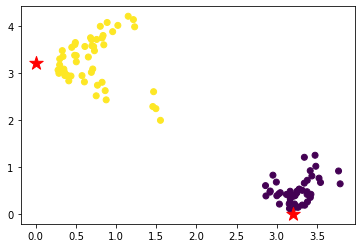

In [56]:
plt.scatter(X2[:,0], X2[:,1], c=model.labels_) # c=y 도 고려
cc = model.transform(model.cluster_centers_)
plt.scatter(cc[:,0], cc[:,1], c='r', s=200, marker='*')

### DBSCAN
- DBSCAN 은 반지름과 샘플갯수가 주어지면 그 반지름 안에 해당 샘플갯수만큼 있는 이웃을 확장해 나가는 군집 알고리즘이다.
- 아래 그림은 샘플갯수가 4개, 반지름이 $\epsilon$ 인 경우이다. 빨간 점은 **핵심샘플**, 노란 점은 **경계샘플**, N은 **잡음샘플** 이다.

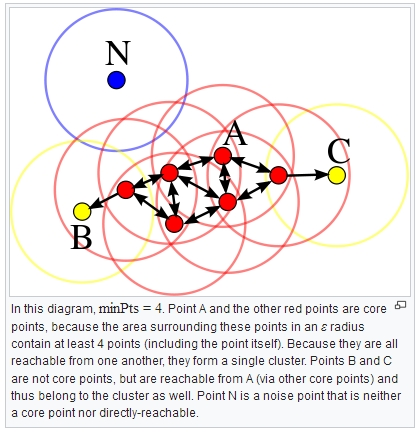

(100, 2)

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

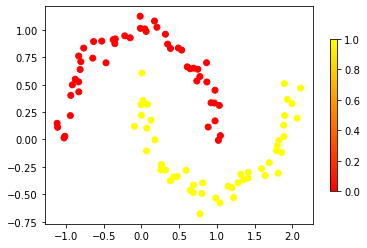

In [36]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.07, random_state=1)
display(X.shape, y)

plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.colorbar(shrink=0.7)

In [38]:
from sklearn.cluster import DBSCAN

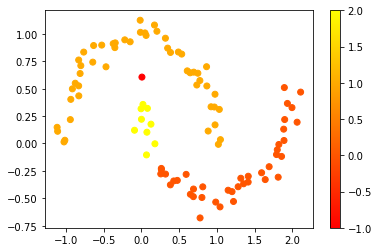

In [39]:
dbscan = DBSCAN(min_samples=2, eps=0.2)
dbscan.fit(X)

plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap='autumn')
plt.colorbar()

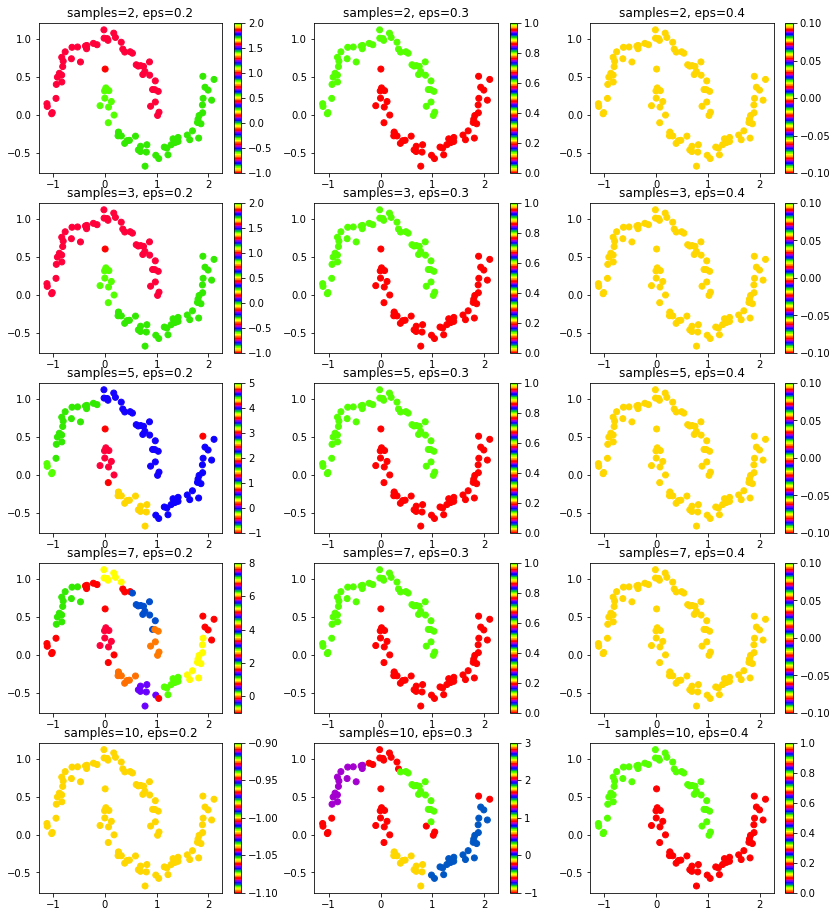

In [40]:
n=1
plt.figure(figsize=[14,16])

for samples in [2,3,5,7,10]:
    for eps in [0.2, 0.3, 0.4]:
        dbscan = DBSCAN(min_samples=samples, eps=eps)
        label = dbscan.fit_predict(X)
        
        plt.subplot(5,3,n); n+=1
        plt.title('samples=%d, eps=%.1f' % (samples,eps))
        plt.scatter(X[:,0], X[:,1], c=label, cmap='prism')
        plt.colorbar()